#Importing Libraries

In [ ]:
# Install the library using pip
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=6fcf50a77607c45371ae0b62f2dc3cadc923d02f6af7aca6533d371b41696422
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
# Read local file
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/FoodValues.csv'
df = pd.read_csv(file_path)
X = np.array(df.Description)

Mounted at /content/drive


In [ ]:
df.columns

Index(['foodId', 'location', 'establishmentId', 'stallId', 'genre', 'foodName',
       'Ratings', 'Description', 'imageId'],
      dtype='object')

In [ ]:
df = df[['genre', 'Description', 'foodName']]
df.head()

,genre,Description,foodName
0,Indian,Butter Chicken: Butter Chicken is a popular In...,Butter Chicken
1,Indian,Chicken Tikka Masala: Chicken Tikka Masala is ...,Chicken Tikka Masala
2,Indian,Tandoori Chicken: Tandoori Chicken is a well-k...,Tandoori Chicken
3,Indian,Rogan Josh: Rogan Josh is a flavorful Kashmiri...,Rogan Josh
4,Indian,Palak Paneer: Palak Paneer is a vegetarian Ind...,Palak Paneer


In [ ]:
df = df.dropna()

# Tokenising Test Data

In [ ]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
embed_data = embeddings

#Principal Components Analysis

In [ ]:
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-1.915568,-1.714567,1.888559,-0.886834,-1.522281
1,-2.930609,-2.847289,1.794130,-1.474546,-0.632325
2,-4.052889,-1.968756,2.068654,-1.983181,-1.095355
3,-0.753184,0.415944,0.087024,-3.589284,-0.180949
4,-1.301300,2.442956,-0.528436,2.205786,0.920334


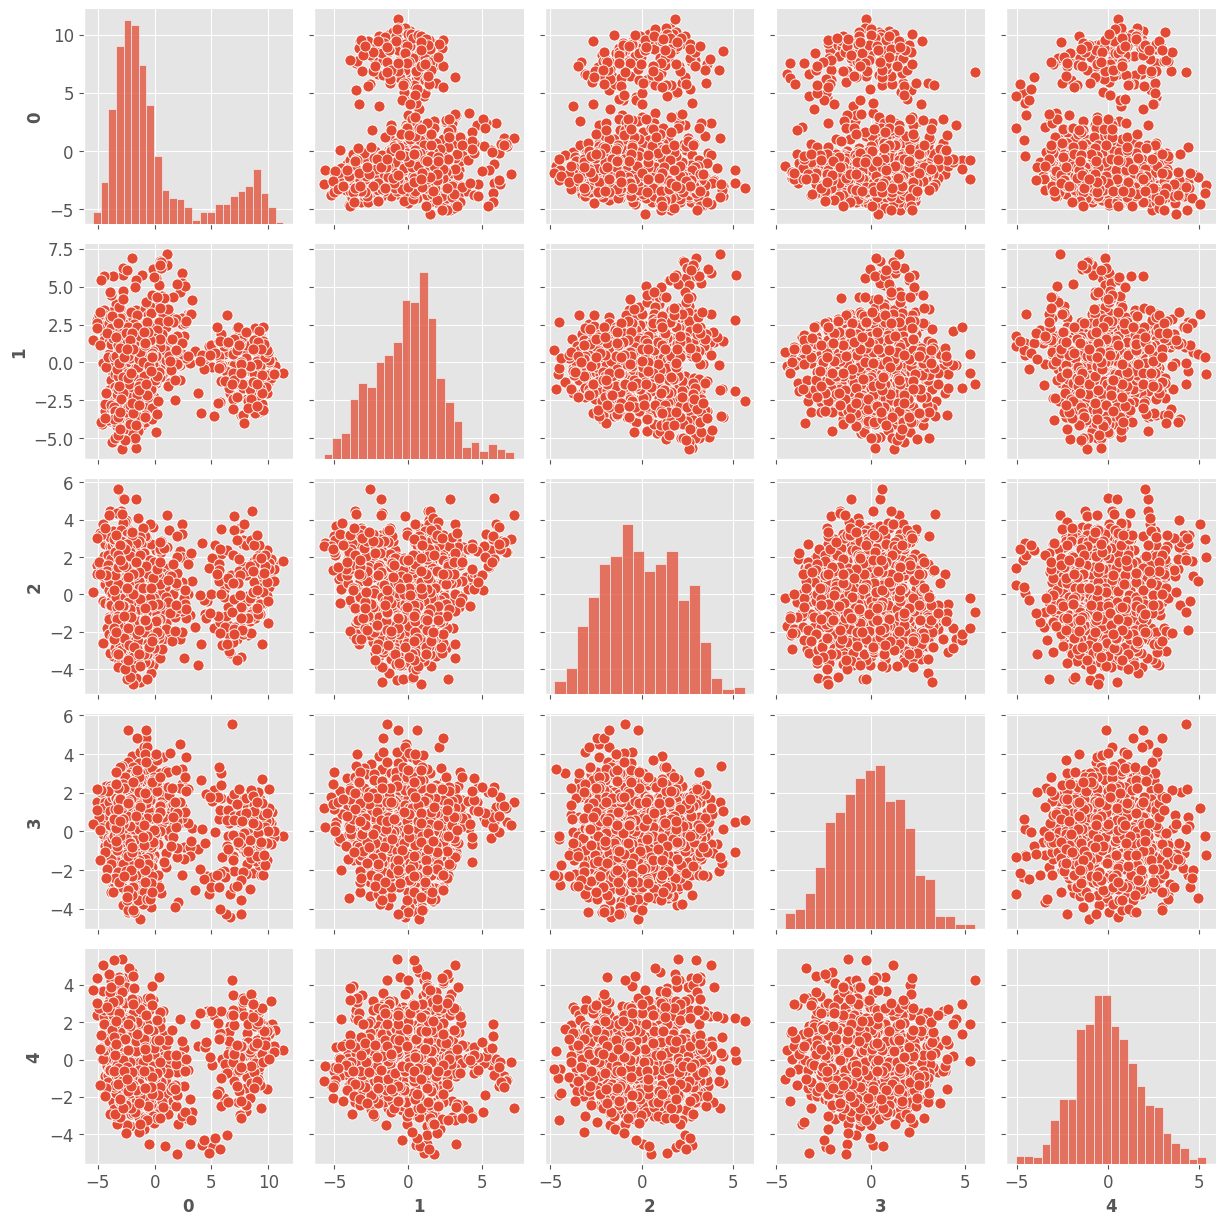

In [ ]:
sns.pairplot(pca_data)

# Definition of Cosine Similarity and Function for Recommendation


In [ ]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  food_recomm =  df['foodName'].loc[index_recomm].values
  result = {'Food Item':food_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The searched food is this one: %s \n'%(df['foodName'].loc[index]))
    k=1
    for food in food_recomm:
      print('The number %i recommended food is this: %s \n'%(k,food))
      k=k+1
  if print_recommendation_plots==True:
    print('The description of the searched food is this:\n %s \n'%(df['Description'].loc[index]))
    k=1
    for q in range(len(food_recomm)):
      plot_q = df['Description'].loc[index_recomm[q]]
      print('The description of the number %i recommended food is this:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the searched food is this:\n %s \n'%(df['genre'].loc[index]))
    k=1
    for q in range(len(food_recomm)):
      plot_q = df['genre'].loc[index_recomm[q]]
      print('The genre of the number %i recommended food is this:\n %s \n'%(k,plot_q))
      k=k+1
  return result

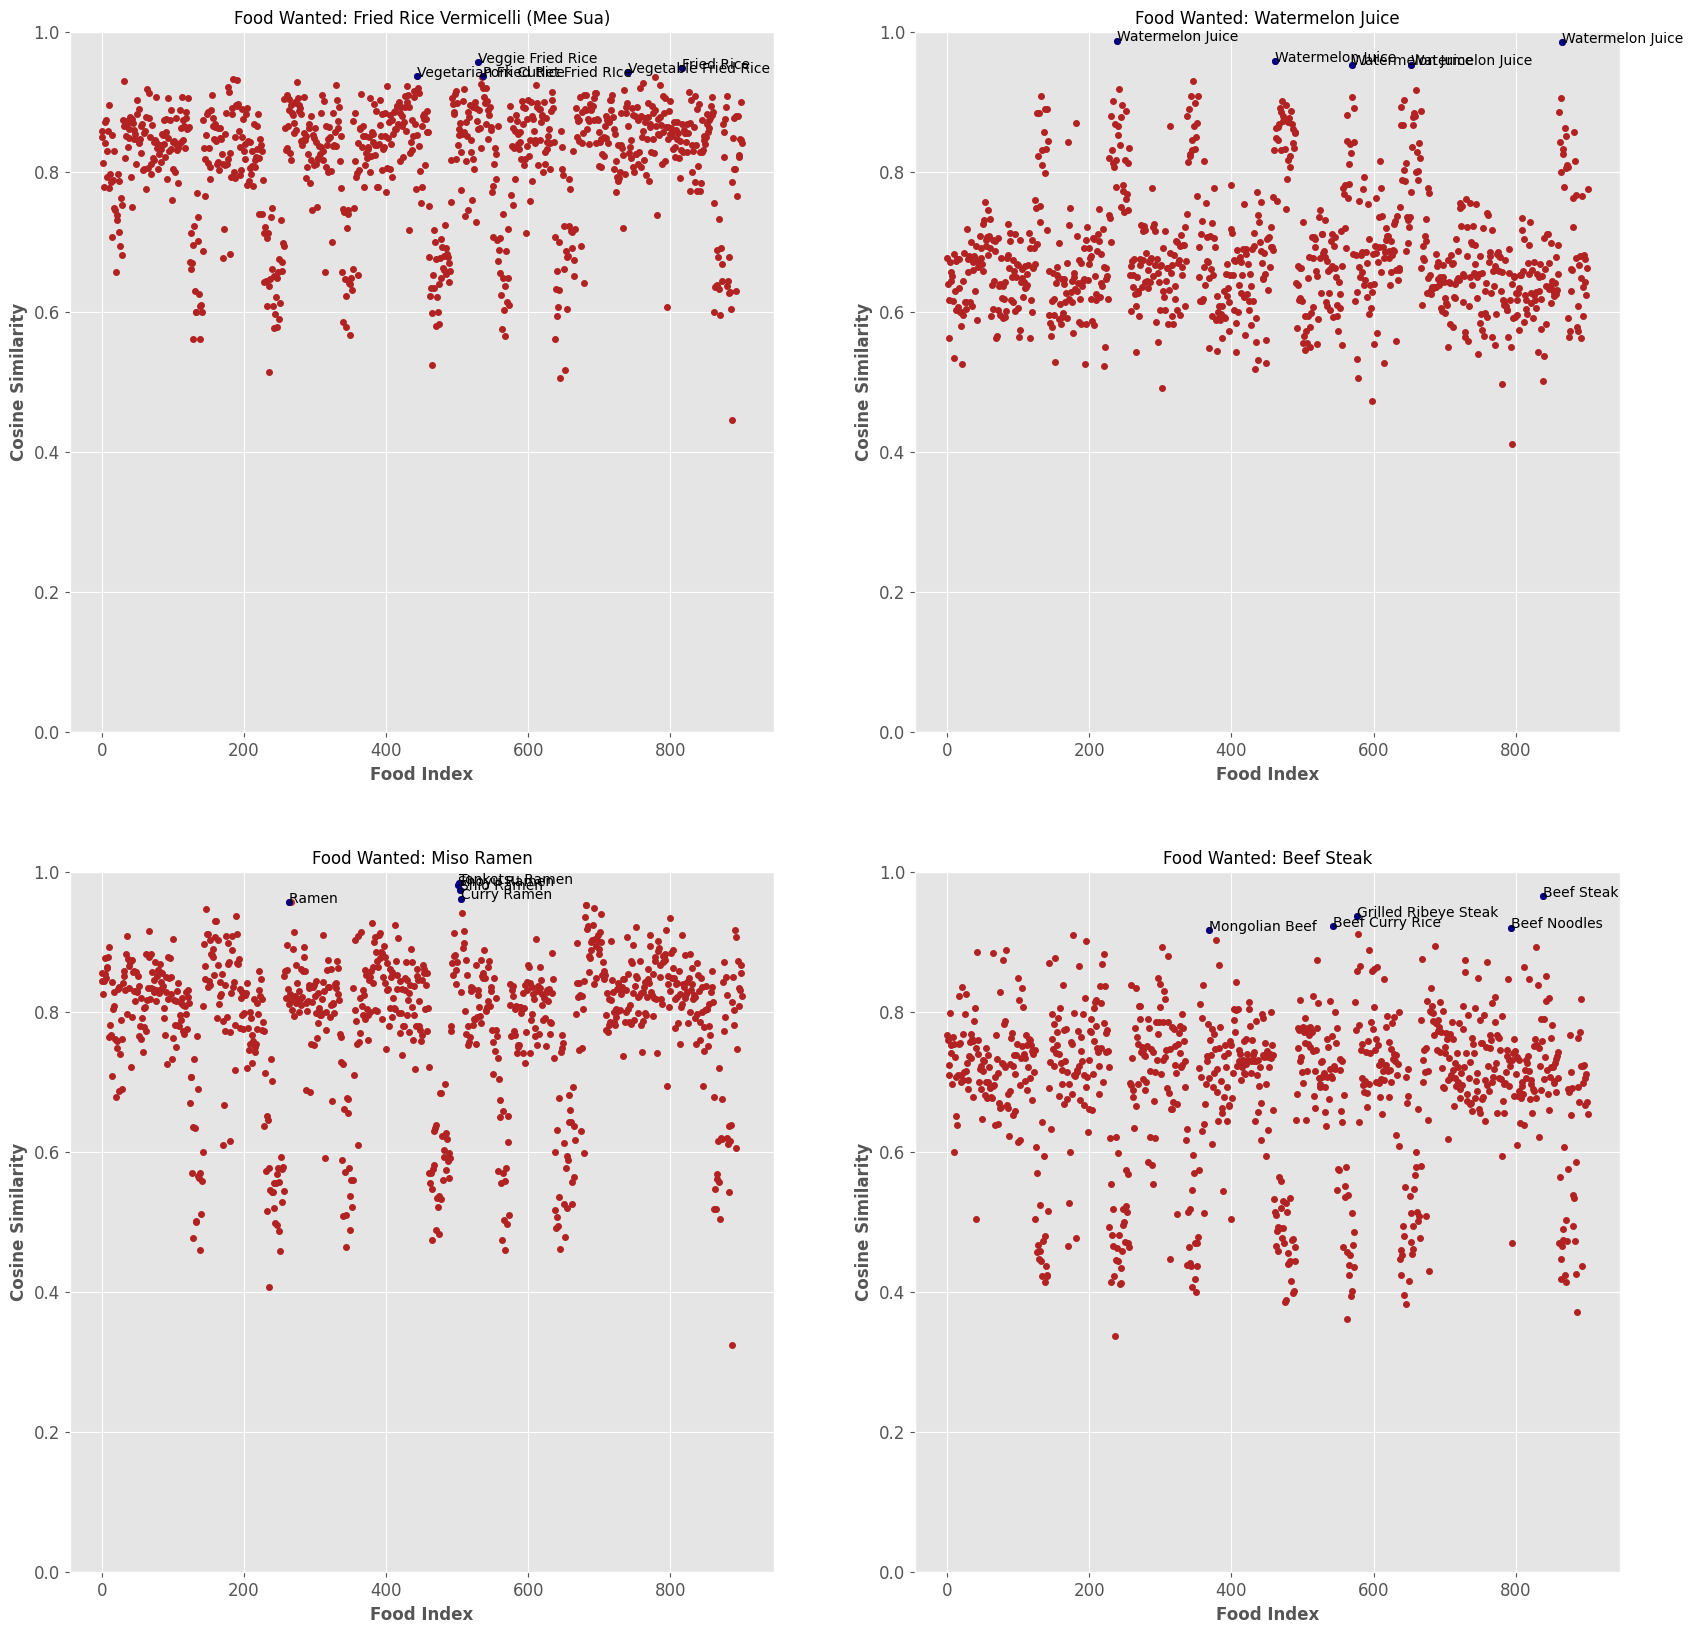

In [ ]:
#Plotting of graph to show the cosine of similarity of each food item to initial item
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Food Item']
  plt.plot(x,y,'.',color='navy',label='Recommended Food')
  plt.title('Food Wanted: '+df['foodName'].loc[index])
  plt.xlabel('Food Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

#Different Tests for Recommendations

In [ ]:
# Testing for recommendation of beef steak
give_recommendations(335,True)

The searched food is this one: Naan (Indian Bread) 

The number 1 recommended food is this: Naan 

The number 2 recommended food is this: Naan Bread 

The number 3 recommended food is this: Tandoori Naan 

The number 4 recommended food is this: Chole Bhature (Chickpea Curry with Fried Bread) 

The number 5 recommended food is this: Chole Bhature 



{'Food Item': array(['Naan', 'Naan Bread', 'Tandoori Naan',
        'Chole Bhature (Chickpea Curry with Fried Bread)', 'Chole Bhature'],
       dtype=object),
 'Index': [10, 449, 781, 329, 451]}

In [ ]:
# Testing for recommendation of beef steak (description and genre)
give_recommendations(597, False, True, True)

The description of the searched food is this:
 Beef Steak: A classic and hearty dish, Beef Steak features a tender and well-seasoned beef steak grilled or pan-seared to the desired level of doneness, creating a flavorful and indulgent option. 

The description of the number 1 recommended food is this:
 Beef Steak: Beef Steak features a juicy and tender steak cooked to the desired level of doneness, often served with a choice of side dishes and sauces, creating a hearty and indulgent meal. 

The description of the number 2 recommended food is this:
 Grilled Ribeye Steak: A premium and succulent dish, Grilled Ribeye Steak features a tender and well-marbled ribeye steak seasoned and grilled to perfection, creating a flavorful and satisfying option. 

The description of the number 3 recommended food is this:
 Beef Curry Rice: A flavorful and hearty dish, Beef Curry Rice features tender beef pieces cooked in a savory curry sauce served with rice, creating a satisfying and protein-rich meal.

{'Food Item': array(['Beef Steak', 'Grilled Ribeye Steak', 'Beef Curry Rice',
        'Beef Noodles', 'Mongolian Beef'], dtype=object),
 'Index': [838, 576, 543, 793, 369]}

In [ ]:
# Testing for recommendation (Description)
give_recommendations(597,False,True)

The description of the searched food is this:
 Beef Steak: A classic and hearty dish, Beef Steak features a tender and well-seasoned beef steak grilled or pan-seared to the desired level of doneness, creating a flavorful and indulgent option. 

The description of the number 1 recommended food is this:
 Beef Steak: Beef Steak features a juicy and tender steak cooked to the desired level of doneness, often served with a choice of side dishes and sauces, creating a hearty and indulgent meal. 

The description of the number 2 recommended food is this:
 Grilled Ribeye Steak: A premium and succulent dish, Grilled Ribeye Steak features a tender and well-marbled ribeye steak seasoned and grilled to perfection, creating a flavorful and satisfying option. 

The description of the number 3 recommended food is this:
 Beef Curry Rice: A flavorful and hearty dish, Beef Curry Rice features tender beef pieces cooked in a savory curry sauce served with rice, creating a satisfying and protein-rich meal.

{'Food Item': array(['Beef Steak', 'Grilled Ribeye Steak', 'Beef Curry Rice',
        'Beef Noodles', 'Mongolian Beef'], dtype=object),
 'Index': [838, 576, 543, 793, 369]}

In [ ]:
# Testing for recommendation (genre)
give_recommendations(597,False,False,True)

The genres of the searched food is this:
 Western 

The genre of the number 1 recommended food is this:
 Western 

The genre of the number 2 recommended food is this:
 Western 

The genre of the number 3 recommended food is this:
 Japanese 

The genre of the number 4 recommended food is this:
 Chinese 

The genre of the number 5 recommended food is this:
 Chinese 



{'Food Item': array(['Beef Steak', 'Grilled Ribeye Steak', 'Beef Curry Rice',
        'Beef Noodles', 'Mongolian Beef'], dtype=object),
 'Index': [838, 576, 543, 793, 369]}

In [ ]:
# Testing for recommendation (All)
give_recommendations(3,True,True,True)

The searched food is this one: Rogan Josh  

The number 1 recommended food is this: Rogan Josh (Lamb Curry) 

The number 2 recommended food is this: Chicken Tikka Masala 

The number 3 recommended food is this: Chana Masala  

The number 4 recommended food is this: Chole Bhature 

The number 5 recommended food is this: Veggie Satay 

The description of the searched food is this:
 Rogan Josh: Rogan Josh is a flavorful Kashmiri lamb dish cooked with a blend of aromatic spices, including cloves, cinnamon, and cardamom, in a tomato-based sauce. The dish has Persian origins and is now popular in Indian cuisine. 

The description of the number 1 recommended food is this:
 Rogan Josh (Lamb Curry): A rich and aromatic Indian curry, Rogan Josh features tender pieces of lamb cooked in a flavorful and fragrant sauce made with aromatic spices, creating a delightful and indulgent dish. 

The description of the number 2 recommended food is this:
 Chicken Tikka Masala: Chicken Tikka Masala is a class

{'Food Item': array(['Rogan Josh (Lamb Curry)', 'Chicken Tikka Masala', 'Chana Masala ',
        'Chole Bhature', 'Veggie Satay'], dtype=object),
 'Index': [330, 1, 5, 451, 444]}

In [ ]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Food Item'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Searched Food Item'] = df['foodName']
recomm_data = recomm_data[['Searched Food Item','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [ ]:
recomm_data.sample(frac=1).head()

,Searched Food Item,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
591,Perkedel Kentang (Potato fritters),Sweet Potato Fries,Potato Chips,Vegetable Samosas,Masala Dosa (Crispy Pancake with Potato Filling),Fries
108,Braised Chicken Feet,Chicken Feet (Fengzhua),Chicken Curry,General Tso's Chicken (Zòngtǔ jī),Sweet and Sour Chicken,Butter Chicken
383,Gyoza (Pan-Fried Dumplings),Gyoza (Dumplings),Gyoza (Japanese Dumplings),Shumai (Steamed Dumplings),Okonomiyaki (Japanese Pancake),Taro Dumplings (Wu Gok)
44,Ma Po Eggplant (Mápó Qiézi),Kung Pao Chicken (Gōngbǎo jīdīng),Fried Egg Omelette,Mapo Tofu,Szechuan Eggplant,Mapo Tofu (Mápó dòufu)
440,Vegetarian Bee Hoon,Vegetable Biryani,Vegetarian Fried Rice,Vegetable Chow Mein,Fried Bee Hoon,Palak Paneer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model and other necessary files to your Google Drive
model.save('/content/drive/My Drive/my_model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
